In [184]:
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')



In [185]:
directorio = '/Users/carlosabraham1/Documentos1/ciencia de datos /proyecto/house-prices-advanced-regression-techniques'
archivos = os.listdir(directorio)

ruta_datos_entrenamiento = os.path.join(directorio, 'train.csv')
ruta_datos_prueba = os.path.join(directorio, 'test.csv')

datos_entrenamiento = pd.read_csv(ruta_datos_entrenamiento)
datos_entrenamiento = datos_entrenamiento.drop('Id', axis=1)

datos_prueba = pd.read_csv(ruta_datos_prueba)
datos_prueba = datos_prueba.drop('Id', axis=1)

In [186]:
datos_entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [187]:
datos_entrenamiento.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [188]:

datos_prueba.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [189]:
#filtrado de datos categóricos y datos numéricos 

cont_cols = datos_entrenamiento.select_dtypes("number").columns
cat_cols = [col for col in datos_entrenamiento.columns if col not in cont_cols]




print(f"{len(cont_cols)} Numerical data columns")
print(f"{len(cat_cols)} Categorical data columns")

37 Numerical data columns
43 Categorical data columns


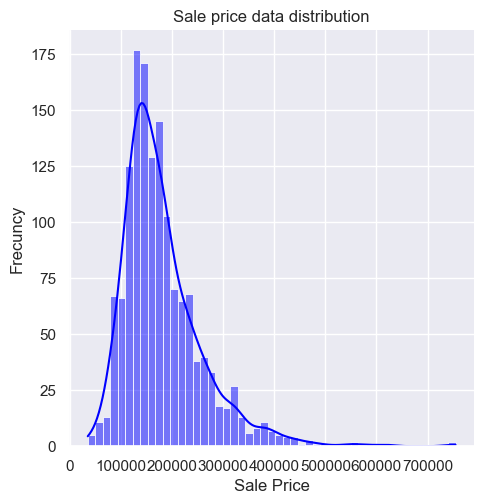

In [190]:
sns.displot(datos_entrenamiento['SalePrice'], kde=True, color='blue')

plt.title('Sale price data distribution')
plt.xlabel('Sale Price')
plt.ylabel('Frecuncy')
plt.grid(True)
plt.show()



In [191]:
datos_entrenamiento['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [192]:
skewness = datos_entrenamiento['SalePrice'].skew()
kurtosis = datos_entrenamiento['SalePrice'].kurt()

skewness =round(skewness, 4)
kurtosis = round(kurtosis, 4)

print('Data asymmetry is:', skewness)
print('Data kurtosis is:', kurtosis)

Data asymmetry is: 1.8829
Data kurtosis is: 6.5363


<Axes: >

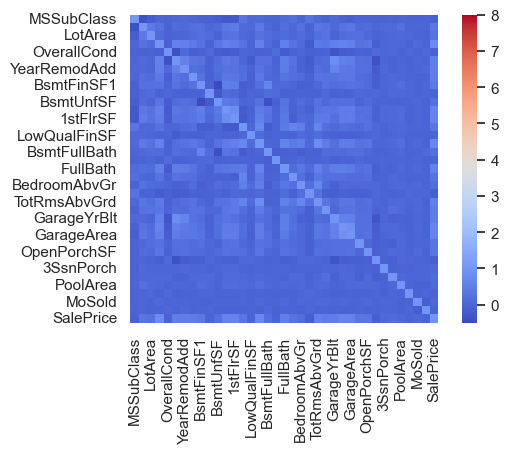

In [193]:
corrmat = datos_entrenamiento[cont_cols].corr()
f, ax = plt.subplots(figsize=(6, 4))

variables2 =[]

for col in corrmat:
    variables2.append(corrmat)

sns.heatmap(corrmat,cbar=True, annot=False, vmax=8, square=True, cmap='coolwarm')


In [194]:
corrmat.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856


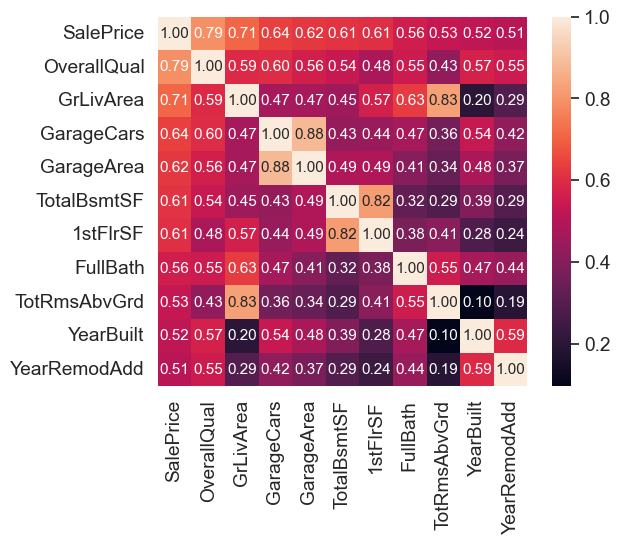

In [195]:
k = 11
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(datos_entrenamiento[cols].values.T)

variables = []

for col in cols: 
    variables.append(col)

sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': k}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [196]:
variables

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd']

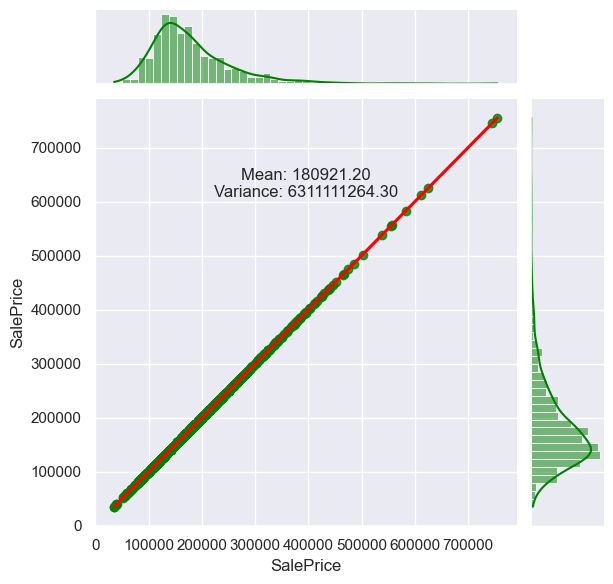

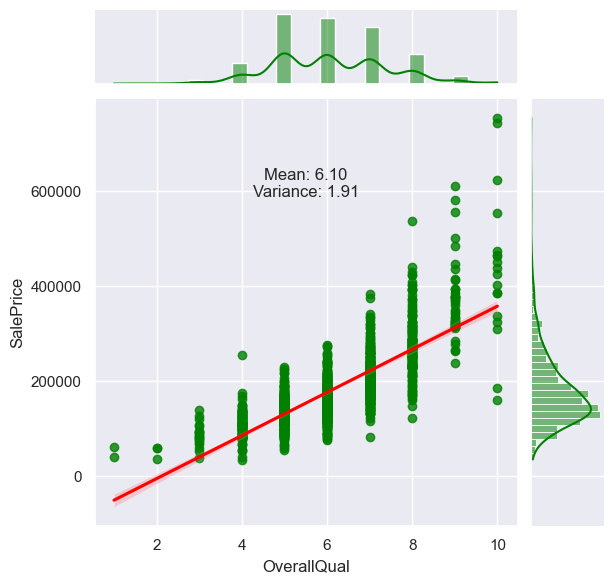

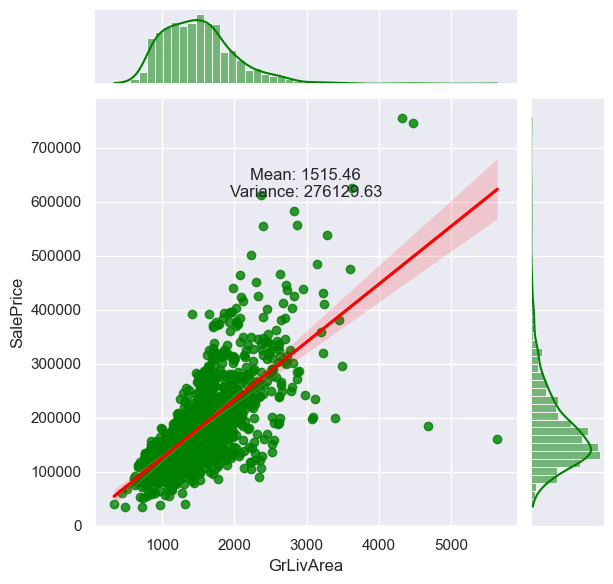

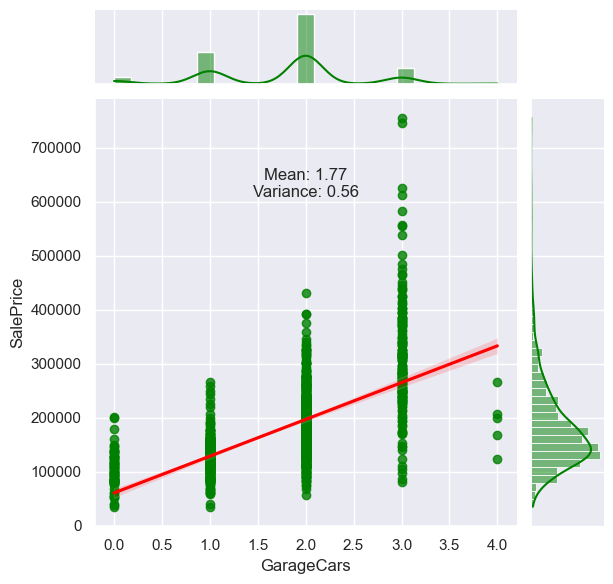

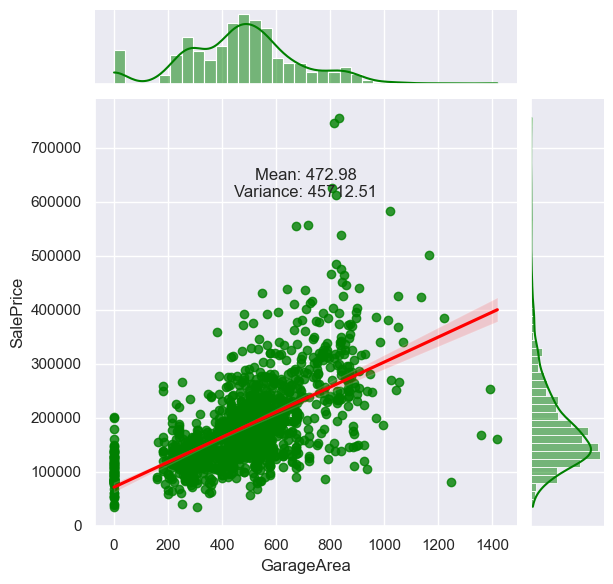

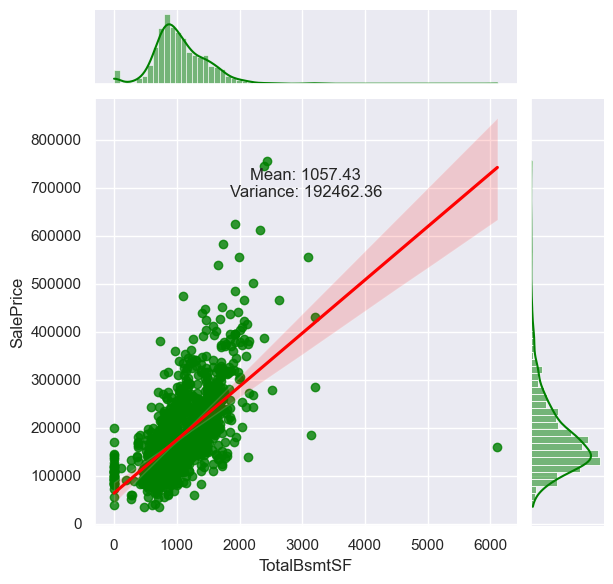

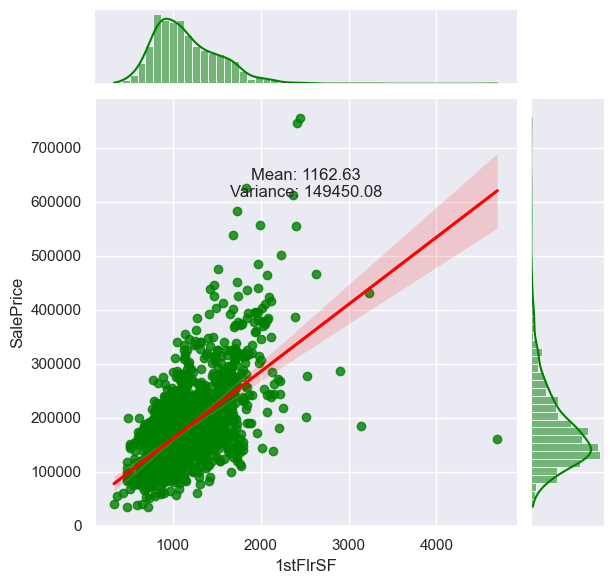

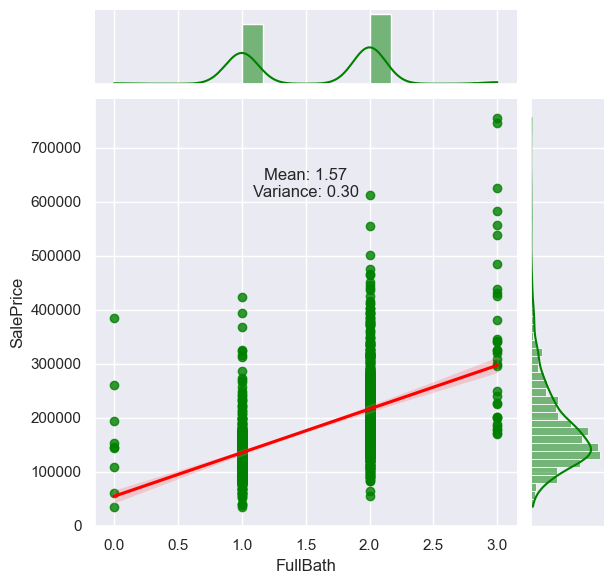

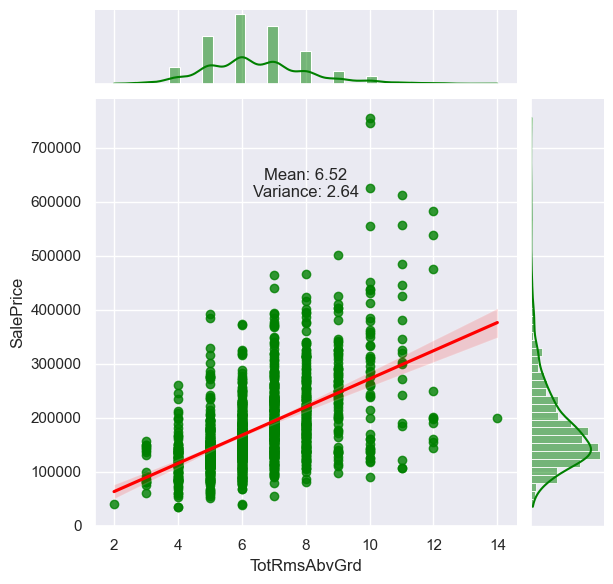

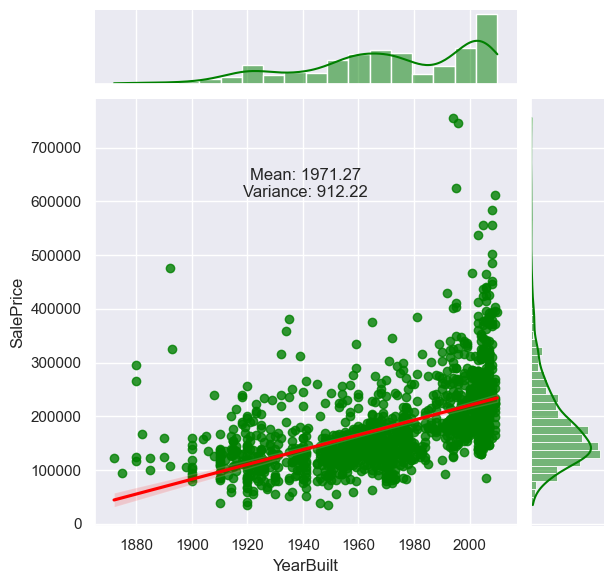

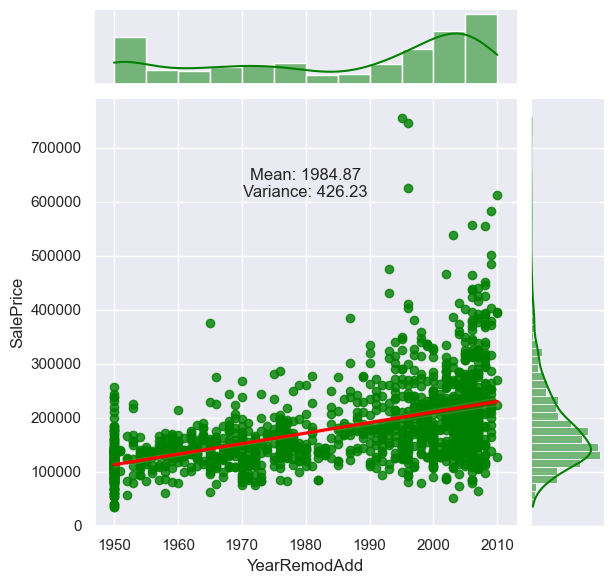

In [197]:
cols = variables
data = datos_entrenamiento[cols]

sns.set()

for col in cols: 
    sns.jointplot(
        x=col,
        y='SalePrice',
        data=data,
        kind='reg',
        color='Green',
        line_kws={'color': 'red'})
    plt.text(0.5, 
             0.8, 
             f'Mean: {data[col].mean():.2f}\nVariance: {data[col].var():.2f}', 
             horizontalalignment='center', 
             verticalalignment='center', 
             transform=plt.gca().transAxes)

    plt.show()

    
        
        

In [198]:
x_entrenamiento, x_prueba, y_entrenamiento, y_prueba = train_test_split(
    datos_entrenamiento[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd']],
    datos_entrenamiento['SalePrice'],
    test_size=0.25
)

In [199]:
x = datos_entrenamiento[['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd']]

y = datos_entrenamiento[['SalePrice']]

Using "Sklearn" Decison tree regressor 

In [200]:
reg = DecisionTreeRegressor(random_state=0)
reg.fit(x_entrenamiento,y_entrenamiento)


DecisionTreeRegressor(random_state=0)

In [201]:
y_pred = reg.predict(x)

In [202]:
DFR_results = []


mae_DFR = mean_absolute_error(y, y_pred)
mse_DFR = mean_squared_error(y, y_pred)
rmse_DFR = np.sqrt(mse_DFR)
r2_DFR = r2_score(y, y_pred)



In [203]:
print('Mean absolute error:', mae_DFR)
print('Mean square error:', mse_DFR)
print('Root mean square error:', rmse_DFR)
print('R**2 Score',r2_DFR)



Mean absolute error: 6291.195205479452
Mean square error: 476310287.69520545
Root mean square error: 21824.5340773911
R**2 Score 0.924476572942103


Doing a cross validation to ensure model results quality 

In [204]:
scores_DFR = cross_val_score(reg, x, y, cv=5, scoring='neg_mean_squared_error')  
mse_scores_DFR = -scores_DFR
mse_mean_DFR = mse_scores_DFR.mean()

In [205]:
print("Cross validation scores:", mse_scores_DFR)


print("Mean cross validation score:", mse_mean_DFR)

Cross validation scores: [1.93009816e+09 2.94309415e+09 1.60263930e+09 1.37268213e+09
 1.89476109e+09]
Mean cross validation score: 1948654967.5988014


In [206]:
DFR_results.append({'mae':mae_DFR,
                    'mse':mse_DFR,
                    'rmse':rmse_DFR,
                    'r2':r2_DFR,
                    'Cross validation scores:':mse_scores_DFR,
                    'Mean cross validation score':mse_mean_DFR})

decision_forest_results = pd.DataFrame(DFR_results)

decision_forest_results



,mae,mse,rmse,r2,Cross validation scores:,Mean cross validation score
0,6291.195205,4.763103e+08,21824.534077,0.924477,"[1930098162.5582192, 2943094150.9760275, 16026...",1.948655e+09


Making a comparison between random forest regressor 

In [207]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(x_entrenamiento,y_entrenamiento)

RandomForestRegressor(random_state=42)

In [208]:
y_pred = rf_regressor.predict(x)

In [209]:
RFR_results = []


mae_RFR = mean_absolute_error(y, y_pred)
mse_RFR = mean_squared_error(y, y_pred)
rmse_RFR = np.sqrt(mse_RFR)
r2_RFR = r2_score(y, y_pred)

In [210]:
print('Mean absolute error:', mae_RFR)
print('Mean square error:', mse_RFR)
print('Root mean square error:', rmse_RFR)
print('R**2 Score',r2_RFR)



Mean absolute error: 10588.476236953686
Mean square error: 466628058.2494227
Root mean square error: 21601.575364991848
R**2 Score 0.9260117804910407


In [211]:
scores_RFR = cross_val_score(rf_regressor, x, y, cv=5, scoring='neg_mean_squared_error')  
mse_scores_RFR = -scores_RFR
mse_mean_RFR = mse_scores_RFR.mean()

In [212]:
print("Cross validation scores:", mse_scores_RFR)


print("Mean cross validation score:", mse_mean_RFR)

Cross validation scores: [8.99467135e+08 1.51529345e+09 1.00037338e+09 6.31406878e+08
 1.23197727e+09]
Mean cross validation score: 1055703622.4597588


Comparing data results

In [213]:
RFR_results.append({'mae':mae_RFR,
                    'mse':mse_RFR,
                    'rmse':rmse_RFR,
                    'r2':r2_RFR,
                    'Cross validation scores:':mse_scores_RFR,
                    'Mean cross validation score':mse_mean_RFR})

random_forest_results = pd.DataFrame(RFR_results)

random_forest_results



,mae,mse,rmse,r2,Cross validation scores:,Mean cross validation score
0,10588.476237,4.666281e+08,21601.575365,0.926012,"[899467135.2970628, 1515293450.9123764, 100037...",1.055704e+09


In [214]:
general_results = pd.concat([random_forest_results, decision_forest_results])
general_results.insert(0, 'Model name', ['Decision forest', 'Random forest'])
general_results.drop(['Cross validation scores:'], axis=1)

,Model name,mae,mse,rmse,r2,Mean cross validation score
0,Decision forest,10588.476237,4.666281e+08,21601.575365,0.926012,1.055704e+09
0,Random forest,6291.195205,4.763103e+08,21824.534077,0.924477,1.948655e+09


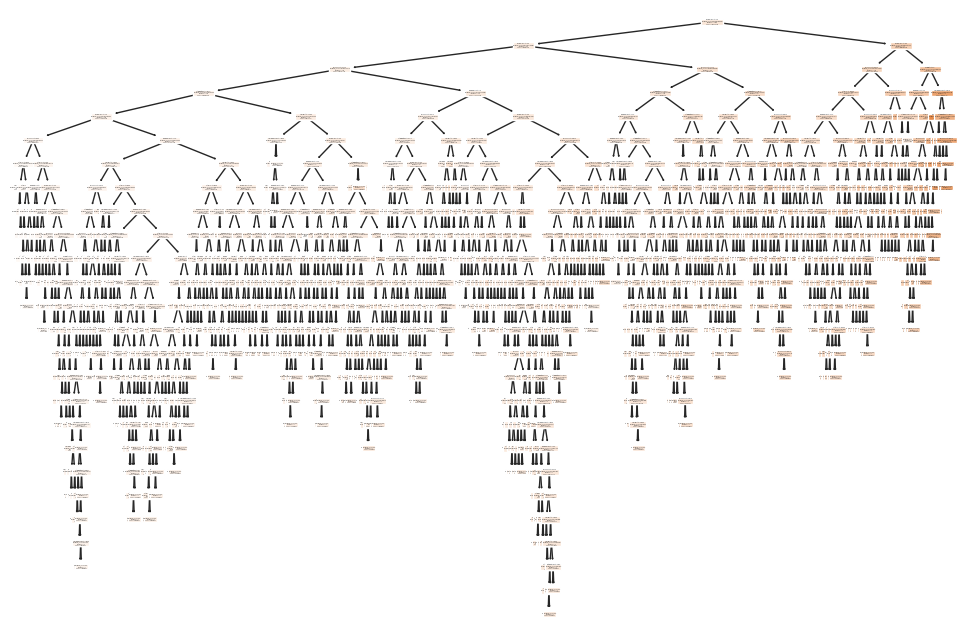

In [215]:
plt.figure(figsize=(12,8))
plot_tree(reg, 
          filled=True, 
          feature_names=['OverallQual',
                        'GrLivArea',
                        'GarageCars',
                        'GarageArea',
                        'TotalBsmtSF',
                        '1stFlrSF',
                        'FullBath',    
                        'TotRmsAbvGrd',
                        'YearBuilt',
                        'YearRemodAdd'],
                        )

plt.show()

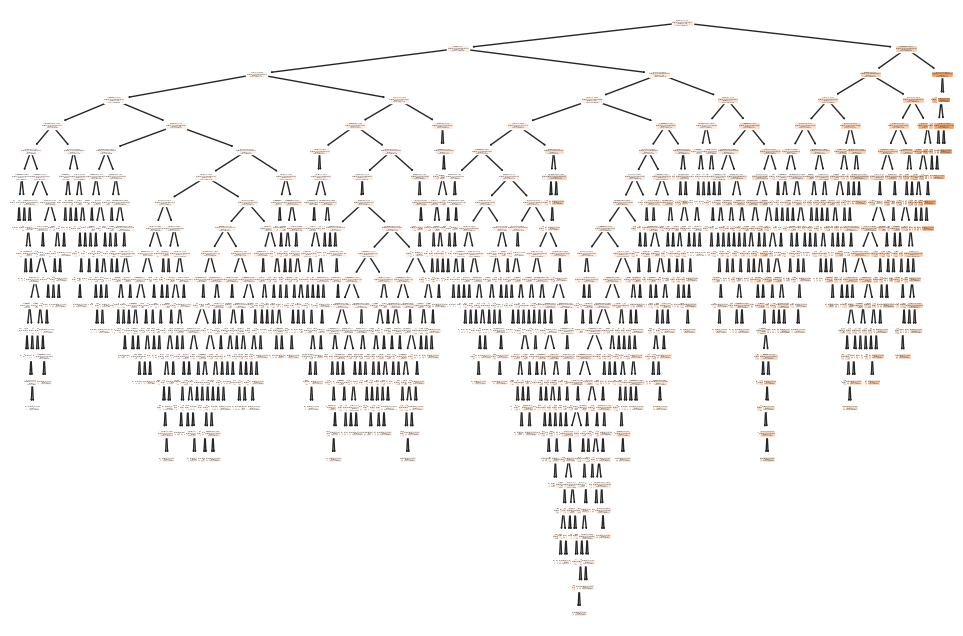

In [216]:

arbol = rf_regressor.estimators_[0]

plt.figure(figsize=(12, 8))
plot_tree(arbol,
          filled=True,
          feature_names=['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
                         '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd'])

plt.show()